Practice Project: Insurance Cost Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv('synthetic_medical_insurance.csv')
print(df.head(10))

   age     sex   bmi  children smoker     region   charges
0   56    male  26.5         4    yes  southeast   8464.92
1   46  female  28.8         3     no  northeast   4016.26
2   32    male  25.4         4    yes  northeast  16228.27
3   60    male  30.2         2     no  southeast  17531.58
4   25    male  26.3         1     no  southeast  22900.22
5   38  female  34.2         4    yes  northwest  20833.00
6   56  female  36.2         2    yes  southwest  19633.09
7   36  female  30.7         2     no  northwest   9052.38
8   40    male  32.8         2     no  southeast   8282.75
9   28  female  42.7         2     no  northwest   2545.47


In [3]:
#replace the '?' entries with 'NaN' values
df.replace('?', np.nan, inplace=True)

In [4]:
#Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Handle missing data:

For continuous attributes (e.g., age), 
replace missing values with the mean.
For categorical attributes (e.g., smoker), 
replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info()

In [6]:
# Handle missing values for 'smoker' (categorical)
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].fillna(is_smoker)

# Handle missing values for 'age' (continuous)
df['age'] = df['age'].astype(float)
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

# Optionally, encode 'smoker' as int (e.g., 1 for 'yes', 0 for 'no')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Convert 'age' to int if needed
df['age'] = df['age'].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB
None


Implement the regression plot for charges with respect to bmi.

(0.0, 58953.28)

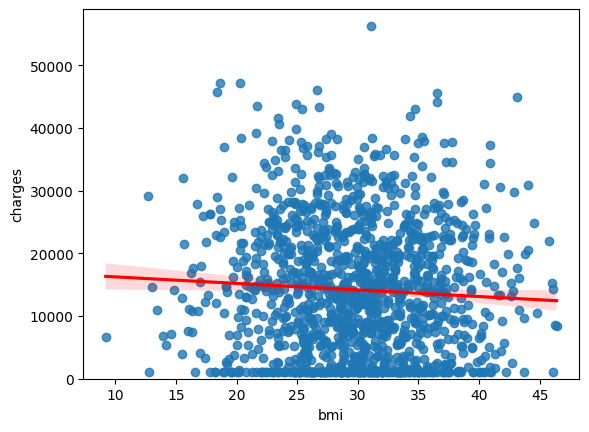

In [7]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

implement the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

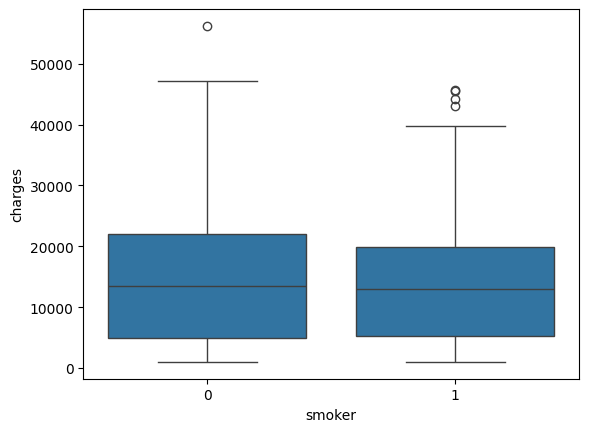

In [8]:
sns.boxplot(x="smoker", y="charges", data=df)

Print the correlation matrix for the dataset.

In [12]:
print(df.select_dtypes(include=[np.number]).corr())

               age       bmi  children    smoker   charges
age       1.000000 -0.031799  0.013692  0.023724  0.026389
bmi      -0.031799  1.000000 -0.041766 -0.023554 -0.058655
children  0.013692 -0.041766  1.000000  0.002649  0.071336
smoker    0.023724 -0.023554  0.002649  1.000000 -0.018002
charges   0.026389 -0.058655  0.071336 -0.018002  1.000000


Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R^2 score of this model.

In [13]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.00032407297205605534


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2 score of this model. You should see an improvement in the performance.

In [ ]:
# Convert categorical columns to dummy variables
Z_encoded = pd.get_dummies(Z, columns=["sex", "region"], drop_first=True)
lm.fit(Z_encoded, Y)
print(lm.score(Z_encoded, Y))

0.01325363315454775


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [18]:
# Y and Z_encoded use the same values as defined in previous cells 
pipe = Pipeline(Input)
pipe.fit(Z_encoded, Y)
ypipe = pipe.predict(Z_encoded)
print(r2_score(Y, ypipe))

0.027244823510862215


Model Refinement
Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [19]:
#Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter alpha = 0.1 Fit the model using training data data subset. Print the R^2 score for the testing data.

In [21]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
# Encode categorical columns in train and test sets
x_train_enc = pd.get_dummies(x_train, columns=["sex", "region"], drop_first=True)
x_test_enc = pd.get_dummies(x_test, columns=["sex", "region"], drop_first=True)

# Ensure both train and test have the same columns
x_test_enc = x_test_enc.reindex(columns=x_train_enc.columns, fill_value=0)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_enc, y_train)
yhat = RidgeModel.predict(x_test_enc)
print(r2_score(y_test, yhat))

0.009044918967164528


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R^2 score for the testing subset.

In [23]:
# x_train_enc, x_test_enc, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train_enc)
x_test_pr = pr.transform(x_test_enc)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

-0.009932244710743054
